# Python Homework 3: Monte Carlo Method

The <i>Monte Carlo Method (Monte Carlo Simulation)</i> was first published in 1949 by  Nicholas Metropolis and  Stanislaw Ulam in the work "The Monte Carlo Method" in the <i>Journal of American Statistics Association</i>. The name Monte Carlo has its origins in the fact that Ulam had an uncle who regularly gambled at the Monte Carlo casino in Monaco. In fact, way before 1949 the method had already been extensively used as a secret project of the U.S. Defense Department during the so-called "Manhattan Project". 

The basic principle of the Monte Carlo Method is to implement on a computer the <b>Strong Law of Large Numbers (SLLN)</b>.

If we can generate a sequence $X_1, X_2, X_3, \ldots$ of i.i.d. random variables (i.e., independent and identically distributed) with finite mean $\mathbb{E}[X_1] = \mu$, then the SLLN guarantees that the <i>sample mean</i> (or <i>empirical mean</i>)

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} \longrightarrow \mu \qquad \text{as } n \rightarrow \infty \text{ with probability 1}.$$

In other words, $\bar{X}_n$ is a good approximation for $\mu$ if the number of simulations $n$ is large enough:

$$ \bar{X}_n \approx \mu \qquad \text{for } n \text{ large}.$$

In addition, if we are interested in approximating the probability that some event $A$ occurs, we might adopt the SLLN as follows: We simulate repeated independent trials of a random experiment and define the sequence of random variables $X_1, X_2,\dots$ via

$$ X_i = \begin{cases} 1 & \text{if $A$ occurs on the $i$-th simulation} \\ 0 & \text{if $A$ does not occur on the $i$-th simulation} \end{cases} \qquad (i = 1,2,3,\ldots).$$

Then, $\bar{X}_n$ is the proportion of the $n$ trials in which $A$ occurs. By construction the random variables $X_1, X_2,\dots$ are independent and identically distributed with mean $\mathbb{E}[X_1] = \mathbb{P}[A]$. Thus, by the SLLN we again obtain

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} \longrightarrow \mathbb{P}[A] \qquad \text{as } n \rightarrow \infty \text{ with probability 1},$$

and hence 

$$ \bar{X}_n \approx \mathbb{P}[A] \qquad \text{for } n \text{ large}.$$



As usual, we start with loading some packages:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Allows to render plots directly within the notebook
%matplotlib inline

## Problem 1 (5 points)

Consider flipping $n$ times a coin. The probability for heads is given by $p$ where $p$ is some parameter which can be chosen from the interval $(0,1)$. 

Write a Python code to simulate $n$ coin flips with heads probability $p$ and compute the running proportion of heads $\bar{X}_n$ for $n$ running from 1 to 1,000 trials. Plot your results. Your plot should illustrate how the proportion of heads converges to $p$ as $n$ approaches 1,000.

In [14]:
### Insert your code here for simulating the coin flips and for computing the average

p = np.random.random()
run_avg = []
X_n = 0

flips = 1000

for i in range(flips):
  current_flip = np.random.random()
  if current_flip > p:
    x_i = 0
  else:
    x_i = 1
  X_n += x_i
  run_avg.append((X_n)/(i + 1))

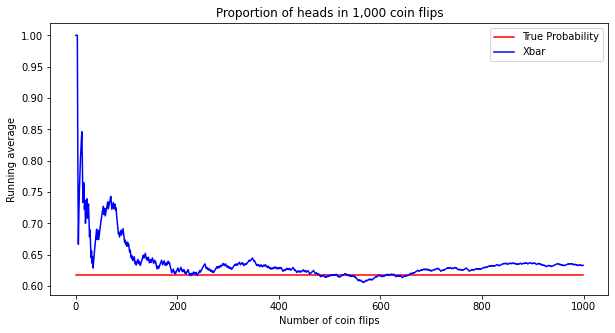

In [15]:
### Complete the plot commands accordingly for also plotting the computed running averages in the graph below
plt.figure(figsize=(10,5))
plt.title("Proportion of heads in 1,000 coin flips")
plt.plot(np.arange(1000), p*np.ones(1000),'-',color="red",label="True Probability") 
plt.plot(np.arange(1000), run_avg, '-', color="blue", label="Xbar")
plt.xlabel("Number of coin flips")
plt.ylabel("Running average")
plt.legend(loc="upper right")

## Problem 2 (5 points)

The Monte Carlo Method is also typically used to numerically compute an approximation of a quantity that is very hard or even impossible to compute like, e.g., integrals. 

Following up on <b>Practice problem 1 on Assignment 4</b>, write a Python code to estimate the irrational number  

$$ \pi = 3.1415926535897932384626433\ldots $$

based on the Monte Carlo Method. Specifically, recall that

$$ \pi = \int_0^1 4 \sqrt{1-x^2} ds$$

and generate a sequence $U_1, U_2, \ldots$ of independent, on $[0,1]$ uniformly distributed random variables to perform your MC estimation.

As in Problem 1 above, plot your estimates for different numbers of simulations $n$ running from 1 to 1,000. Your plot should again illustrate how your estimate appears to converge to $\pi$.

In [16]:
### Implement your MC simulation here

def arrx(n):
  X_i = []
  for i in range(1, n+1):
    U_i = np.random.uniform()
    X_i.append(4 * (math.sqrt(1 - math.pow(U_i, 2))))
  return X_i

est_arr = []

for i in range(1, 1001):
  X_i = arrx(i) # Function call for generating random samples of size i 
  X_n = np.sum(X_i)*(1/i) # Computation of sample mean 
  est_arr.append(X_n)

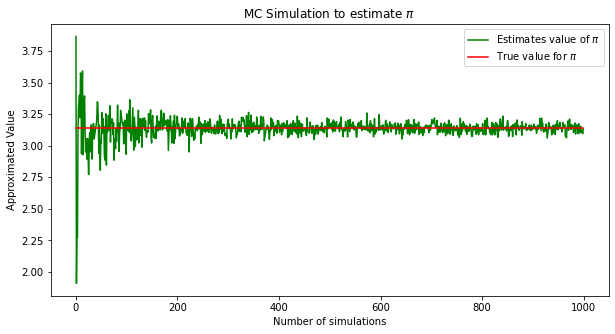

In [17]:
### Complete the plot commands accordingly

plt.figure(figsize=(10,5))
plt.title("MC Simulation to estimate $\pi$")
plt.plot(np.arange(1000),est_arr,'-',color="green",label="Estimates value of $\pi$") 
plt.plot(np.arange(1000),np.pi*np.ones(1000),'-',color="red",label="True value for $\pi$") 
plt.xlabel("Number of simulations")
plt.ylabel("Approximated Value")
plt.legend(loc="upper right")